In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np

In [2]:
#pylab.rcParams.keys()
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
          'figure.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
range_max = 64

rfc1321_table = [0 for i in range(range_max+1)]
with open('rfc1321_table.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        i, t = row
        rfc1321_table[int(i)] = int(t, base=16)

print(rfc1321_table[1:11])
        
result = [0 for i in range(range_max+1)]
with open('out/data.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        i, t_hex, t_dig, lower, upper, width = row
        result[int(i)] = int(t_dig)
        if int(i)>=range_max:
            break

print(result[1:11])

for i in range(1, range_max+1):
    assert(rfc1321_table[i] == result[i])

[3614090360, 3905402710, 606105819, 3250441966, 4118548399, 1200080426, 2821735955, 4249261313, 1770035416, 2336552879]
[3614090360, 3905402710, 606105819, 3250441966, 4118548399, 1200080426, 2821735955, 4249261313, 1770035416, 2336552879]


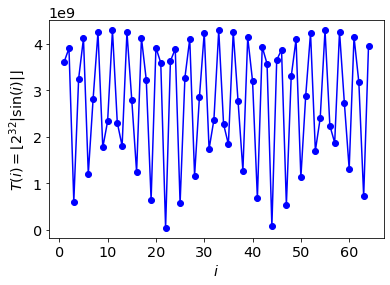

In [4]:
plt.plot(range(1,65), result[1:], '-bo')
plt.xlabel(r'$i$')
plt.ylabel(r'$T(i)=\lfloor2^{32}|\sin(i)|\rfloor$')
plt.savefig('i-vs-T_i.png')

<ipython-input-5-7b9ce2f6da8b>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


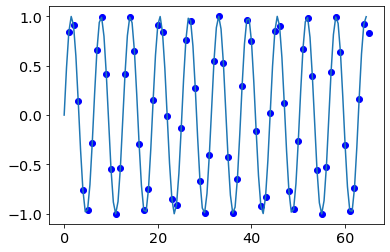

In [5]:
theta = []
sin = []
with open('out/data.csv', 'r') as file:
    reader = csv.reader(file)
    for n,row in enumerate(reader):
        [i,value_hex,value_dig,lower,upper,width] = row
        theta.append(int(i))
        sin.append((int(lower)+int(upper))/(1<<64))
        if n == range_max:
            break
plt.subplot()
plt.plot(theta, sin, 'bo')
plt.subplot()
t = np.arange(0, range_max+1, 0.5)
plt.plot(t, np.sin(t))
plt.show()

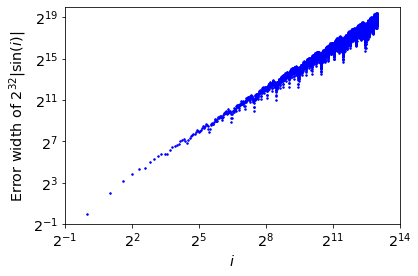

In [6]:
x = []
y = []
with open('out/data.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        [i,value_hex,value_dig,lower,upper,width] = row
        x.append(int(i))
        y.append(int(width))

fig, ax = plt.subplots()
#fig.suptitle('The relation between arguments of sin and their error widths')
ax.set_xlabel(r'$i$')
ax.set_ylabel(r'Error width of $2^{32}|\sin(i)|$')
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=2)

ax.plot(x,y,'o',ms=1.5,color='blue')
ax.set_xlim([1/2,1<<14])
ax.set_ylim([1/2,1<<20])
#plt.show()
plt.savefig('i-vs-error-width.png')